In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Import and store the data in a data frame. (3 points)

In [2]:
df = pd.read_csv('airq402.dat', 
                 sep="\s+", 
                 skiprows=0, 
                 names=['city1',
                        'city2',
                        'average_fare',
                        'distance',
                        'average_weekly_passengers',
                        'market_leading_airline',
                        'market_share',
                        'average_fare_2',
                        'low_price_airline',
                        'market_share_2',
                        'price']
                  )
df.head()

,city1,city2,average_fare,distance,average_weekly_passengers,market_leading_airline,market_share,average_fare_2,low_price_airline,market_share_2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# 2. Remove the outliers from the data (5 points)

In [3]:
p75 = df.quantile(0.75)
p25 = df.quantile(0.25)
df_iqr = p75 - p25
mini = p25 - 1.5*df_iqr
maxi = p75 + 1.5*df_iqr

In [4]:
k = (df_iqr.to_frame().T.columns)

In [5]:
df1 = df[k]

In [6]:
outliers_removed_df = df1[(df1 > mini) & (df1 < maxi)].dropna()
outliers_removed_df.head()

,average_fare,distance,average_weekly_passengers,market_share,average_fare_2,market_share_2,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [7]:
outliers_removed_df.describe()

,average_fare,distance,average_weekly_passengers,market_share,average_fare_2,market_share_2,price
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,160.292068,1039.383051,499.132644,60.636938,162.589051,34.373028,140.431073
std,48.468895,615.224361,327.573566,19.361447,53.288002,27.183305,39.849789
min,50.520000,108.000000,181.410000,17.680000,50.520000,1.060000,50.520000
25%,126.600000,564.000000,249.020000,47.020000,125.590000,13.060000,115.110000
50%,160.710000,914.000000,372.930000,59.750000,160.740000,26.250000,138.020000
75%,194.050000,1381.000000,644.560000,74.660000,198.470000,52.930000,166.260000
max,288.580000,2724.000000,1519.890000,100.000000,315.860000,100.000000,250.020000


# 3. Treat “Average Fare” – 3<sup>rd</sup>Column as your Dependent Variable and Rest of the columns as Independent Variable.&nbsp;(3 points)


In [8]:
X = outliers_removed_df.drop(['average_fare'], axis=1) #independent variables
y = outliers_removed_df[['average_fare']]    #Dependent Variable

# 4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [9]:
corr = (outliers_removed_df.corr()['average_fare'].abs() < 0.1).to_frame() 
corr

,average_fare
average_fare,False
distance,False
average_weekly_passengers,False
market_share,False
average_fare_2,False
market_share_2,False
price,False


In [10]:
# Assuming that question meant not to consider .abs() as it returned empty array
# here we are dropping any value less than 0.1
#corr = (outliers_removed_df.corr()['average_fare'] < 0.1).to_frame() 

In [11]:
corr

,average_fare
average_fare,False
distance,False
average_weekly_passengers,False
market_share,False
average_fare_2,False
market_share_2,False
price,False


In [12]:
corr = corr[corr == True].dropna(axis=0)

In [13]:
corr.T.columns

Index([], dtype='object')

In [14]:
X = X.drop(corr.T.columns,axis=1)

# 5. Create scatter Plot of Independent Variable vs Dependent Variable. (4 points)

In [15]:
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

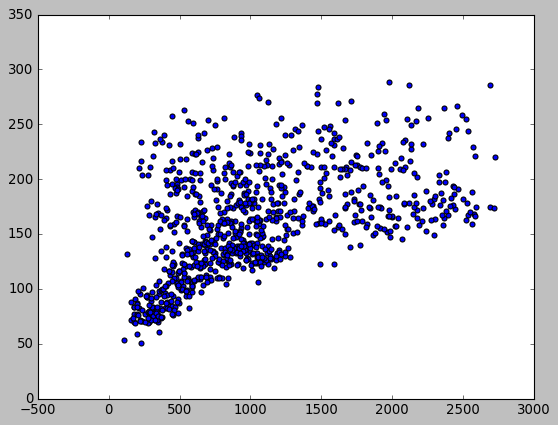

In [16]:
plt.scatter(x="distance", y="average_fare", data=outliers_removed_df)

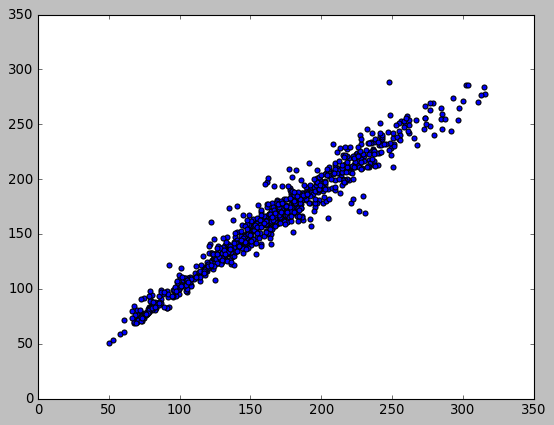

In [17]:
plt.scatter(x="average_fare_2", y="average_fare", data=outliers_removed_df)

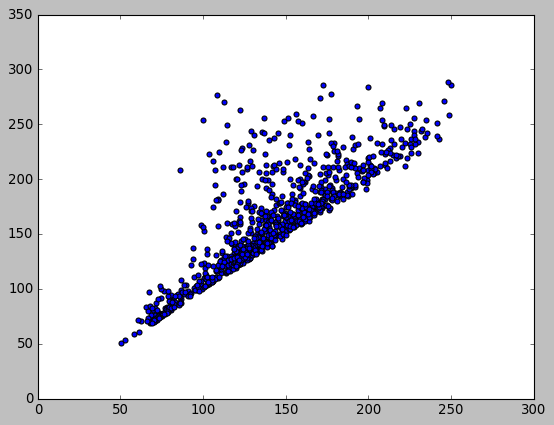

In [18]:
plt.scatter(x="price", y="average_fare", data=outliers_removed_df)

# 6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [19]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)
regression_model = LinearRegression() 

In [20]:
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 7. Print the coefficients &amp; intercepts of the linear regression model (5 points)

In [21]:
pd.DataFrame(regression_model.coef_[0],X_train.columns)

,0
distance,0.002681
average_weekly_passengers,-0.003401
market_share,0.077984
average_fare_2,0.729859
market_share_2,-0.032056
price,0.232008


In [22]:
regression_model.intercept_[0]

4.084548338987787

In [23]:
regression_model.score(X_test, y_test)

0.9699617495264753